## Ten-Year Coronary Heart Disease (CHD) Risk Predictor

**Cardiovascular disease, with heart disease at its forefront, remains a leading cause of mortality globally. Early detection and intervention are crucial in mitigating its impact, and advancements in machine learning (ML) offer promising avenues for achieving this goal. This presentation introduces a novel heart disease prediction model, leveraging the power of ML to unlock insights into individual risk profiles.This model aims to transcend traditional risk assessment methods by harnessing the capabilities of ML algorithms.**



This project is done on The "Framingham" heart disease dataset has 15 attributes and over 4,000 records. The target of the dataset is to predict the 10-year risk of coronary heart disease (CHD). 


This project's significance lies in its potential to contribute to early CHD risk assessment, which can enable targeted interventions and lifestyle modifications for at-risk individuals. Moreover, it underscores the importance of data-driven approaches in healthcare decision-making and highlights the relevance of predictive modeling in preventive medicine.

In the following sections, we will delve into the dataset, conduct rigorous analysis, build predictive models, and ultimately aim to enhance our understanding of the factors influencing Ten-Year CHD risk.

In [1]:
#import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### DATA UNDERSTANDING AND PREPROCESSING

In [3]:
#read the dataset

df=pd.read_csv(r"D:\dataset\framingham.csv")

In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Attributes explanation**

- male: Binary variable indicating the gender of the individual (1 for male, 0 for female).
- age: Age of the individual in years.
- education: Level of education of the individual, coded as 1 for some high school, 2 for high school diploma or GED, 3 for some college or vocational school, and 4 for college degree.
- currentSmoker: Binary variable indicating whether the individual is a current smoker (1 for yes, 0 for no).
- cigsPerDay: Number of cigarettes smoked per day (if the individual is a smoker).
- BPMeds: Binary variable indicating whether the individual is on blood pressure medications (1 for yes, 0 for no).
- prevalentStroke: Binary variable indicating whether the individual has a history of stroke (1 for yes, 0 for no).
- prevalentHyp: Binary variable indicating whether the individual has hypertension (1 for yes, 0 for no).
- diabetes: Binary variable indicating whether the individual has diabetes (1 for yes, 0 for no).
- totChol: Total cholesterol level in mg/dL.
- sysBP: Systolic blood pressure in mmHg.
- diaBP: Diastolic blood pressure in mmHg.
- BMI: Body mass index (weight in kg / (height in meters)^2).
- heartRate: Resting heart rate in beats per minute.
- glucose: Plasma glucose level in mg/dL.
- TenYearCHD: Binary variable indicating whether the individual experienced a coronary heart disease (CHD) event within 10 years of the baseline examination (1 for yes, 0 for no).

In [5]:
df.shape

(4240, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


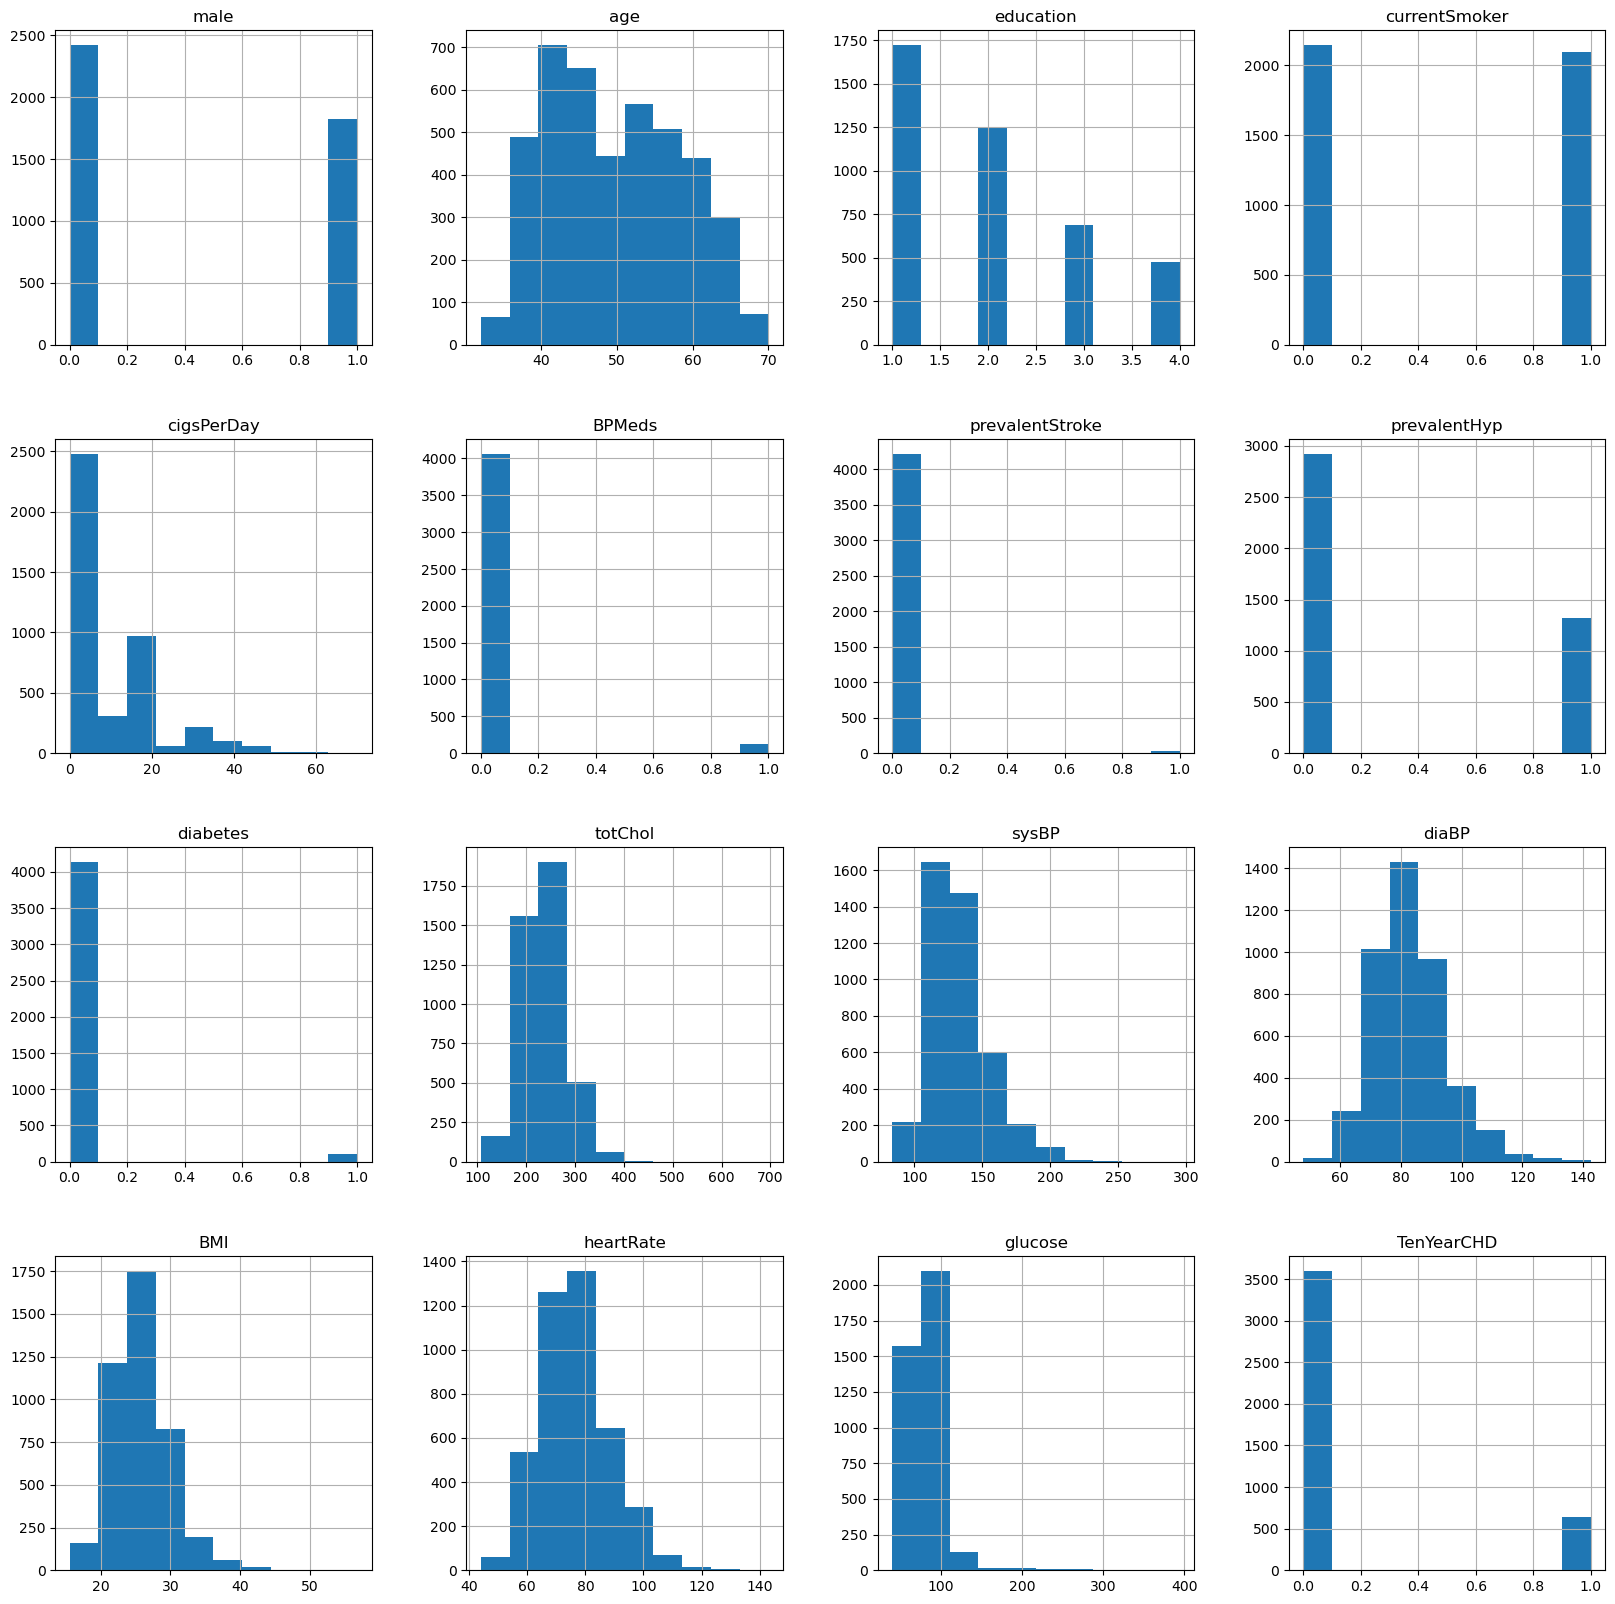

In [8]:
fig=plt.figure(figsize=(20,20))
ax=fig.gca()
df.hist(ax=ax);

In [9]:
# dropping the column "education" which is irrevelevant to our our problem

df.drop(["education"],axis=1, inplace=True)

In [10]:
#checking for missing value percentage
df.isnull().mean()*100

male               0.000000
age                0.000000
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

In [11]:
df['glucose'].fillna(df['glucose'].mean(),inplace=True)

In [12]:
df.isnull().mean()

male               0.000000
age                0.000000
currentSmoker      0.000000
cigsPerDay         0.006840
BPMeds             0.012500
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011792
sysBP              0.000000
diaBP              0.000000
BMI                0.004481
heartRate          0.000236
glucose            0.000000
TenYearCHD         0.000000
dtype: float64

In [13]:
#fetching all the 5 columns with missing values

cols=[ var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

Since all othere columns have missing values less than 5 percent it is good to remove the rows

In [14]:
df[cols].sample(5)

,cigsPerDay,BPMeds,totChol,BMI,heartRate
4072,0.0,0.0,275.0,27.75,67.0
525,0.0,0.0,301.0,24.79,58.0
857,0.0,0.0,195.0,23.09,70.0
4047,20.0,0.0,315.0,22.52,82.0
2975,20.0,0.0,220.0,24.46,77.0


Lets see if we drop the missing values, how much will be left

In [15]:
len(df[cols].dropna())/len(df)

0.964622641509434

96 % data will be left after removal of null values.

In [16]:
new_df=df[cols].dropna()
df.shape, new_df.shape

((4240, 15), (4090, 5))

<Axes: >

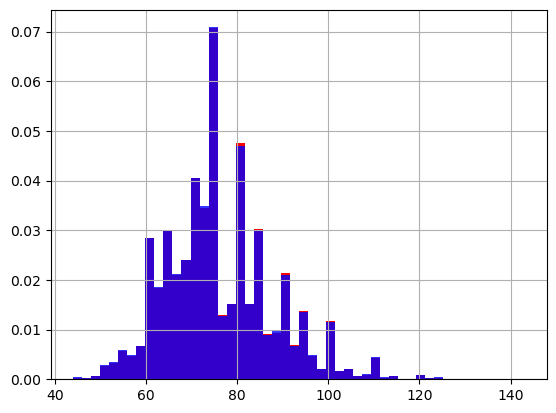

In [17]:
#Plotting a Histogram for old and new dataframe comparision.

fig=plt.figure()
ax=fig.add_subplot(111)

#original data
df['heartRate'].hist(bins = 50, ax = ax, density = True , color = 'red')

#new data
new_df['heartRate'].hist(bins = 50, ax = ax, density = True , color = 'blue' , alpha = 0.8)

Inference: Both the distributions overlap each other and they are comparable, hence we go with removing the rows with missing values

In [18]:
# removing the rows with nulls values

df1 = df.dropna(subset=cols)

# Verify that the rows have been removed
df1.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [19]:
df1.shape

(4090, 15)

In [20]:
# Exploratory Data Analysis

df1.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [21]:
#Let classify the attributes into categorical and random list

catag=[i for i in df1.columns if len(df1[i].unique())<4]
rand=[i for i in df1.columns if len(df1[i].unique())>4]

In [22]:
catag

['male',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [23]:
rand

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [24]:
catag.remove("TenYearCHD")

In [25]:
catag

['male',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes']

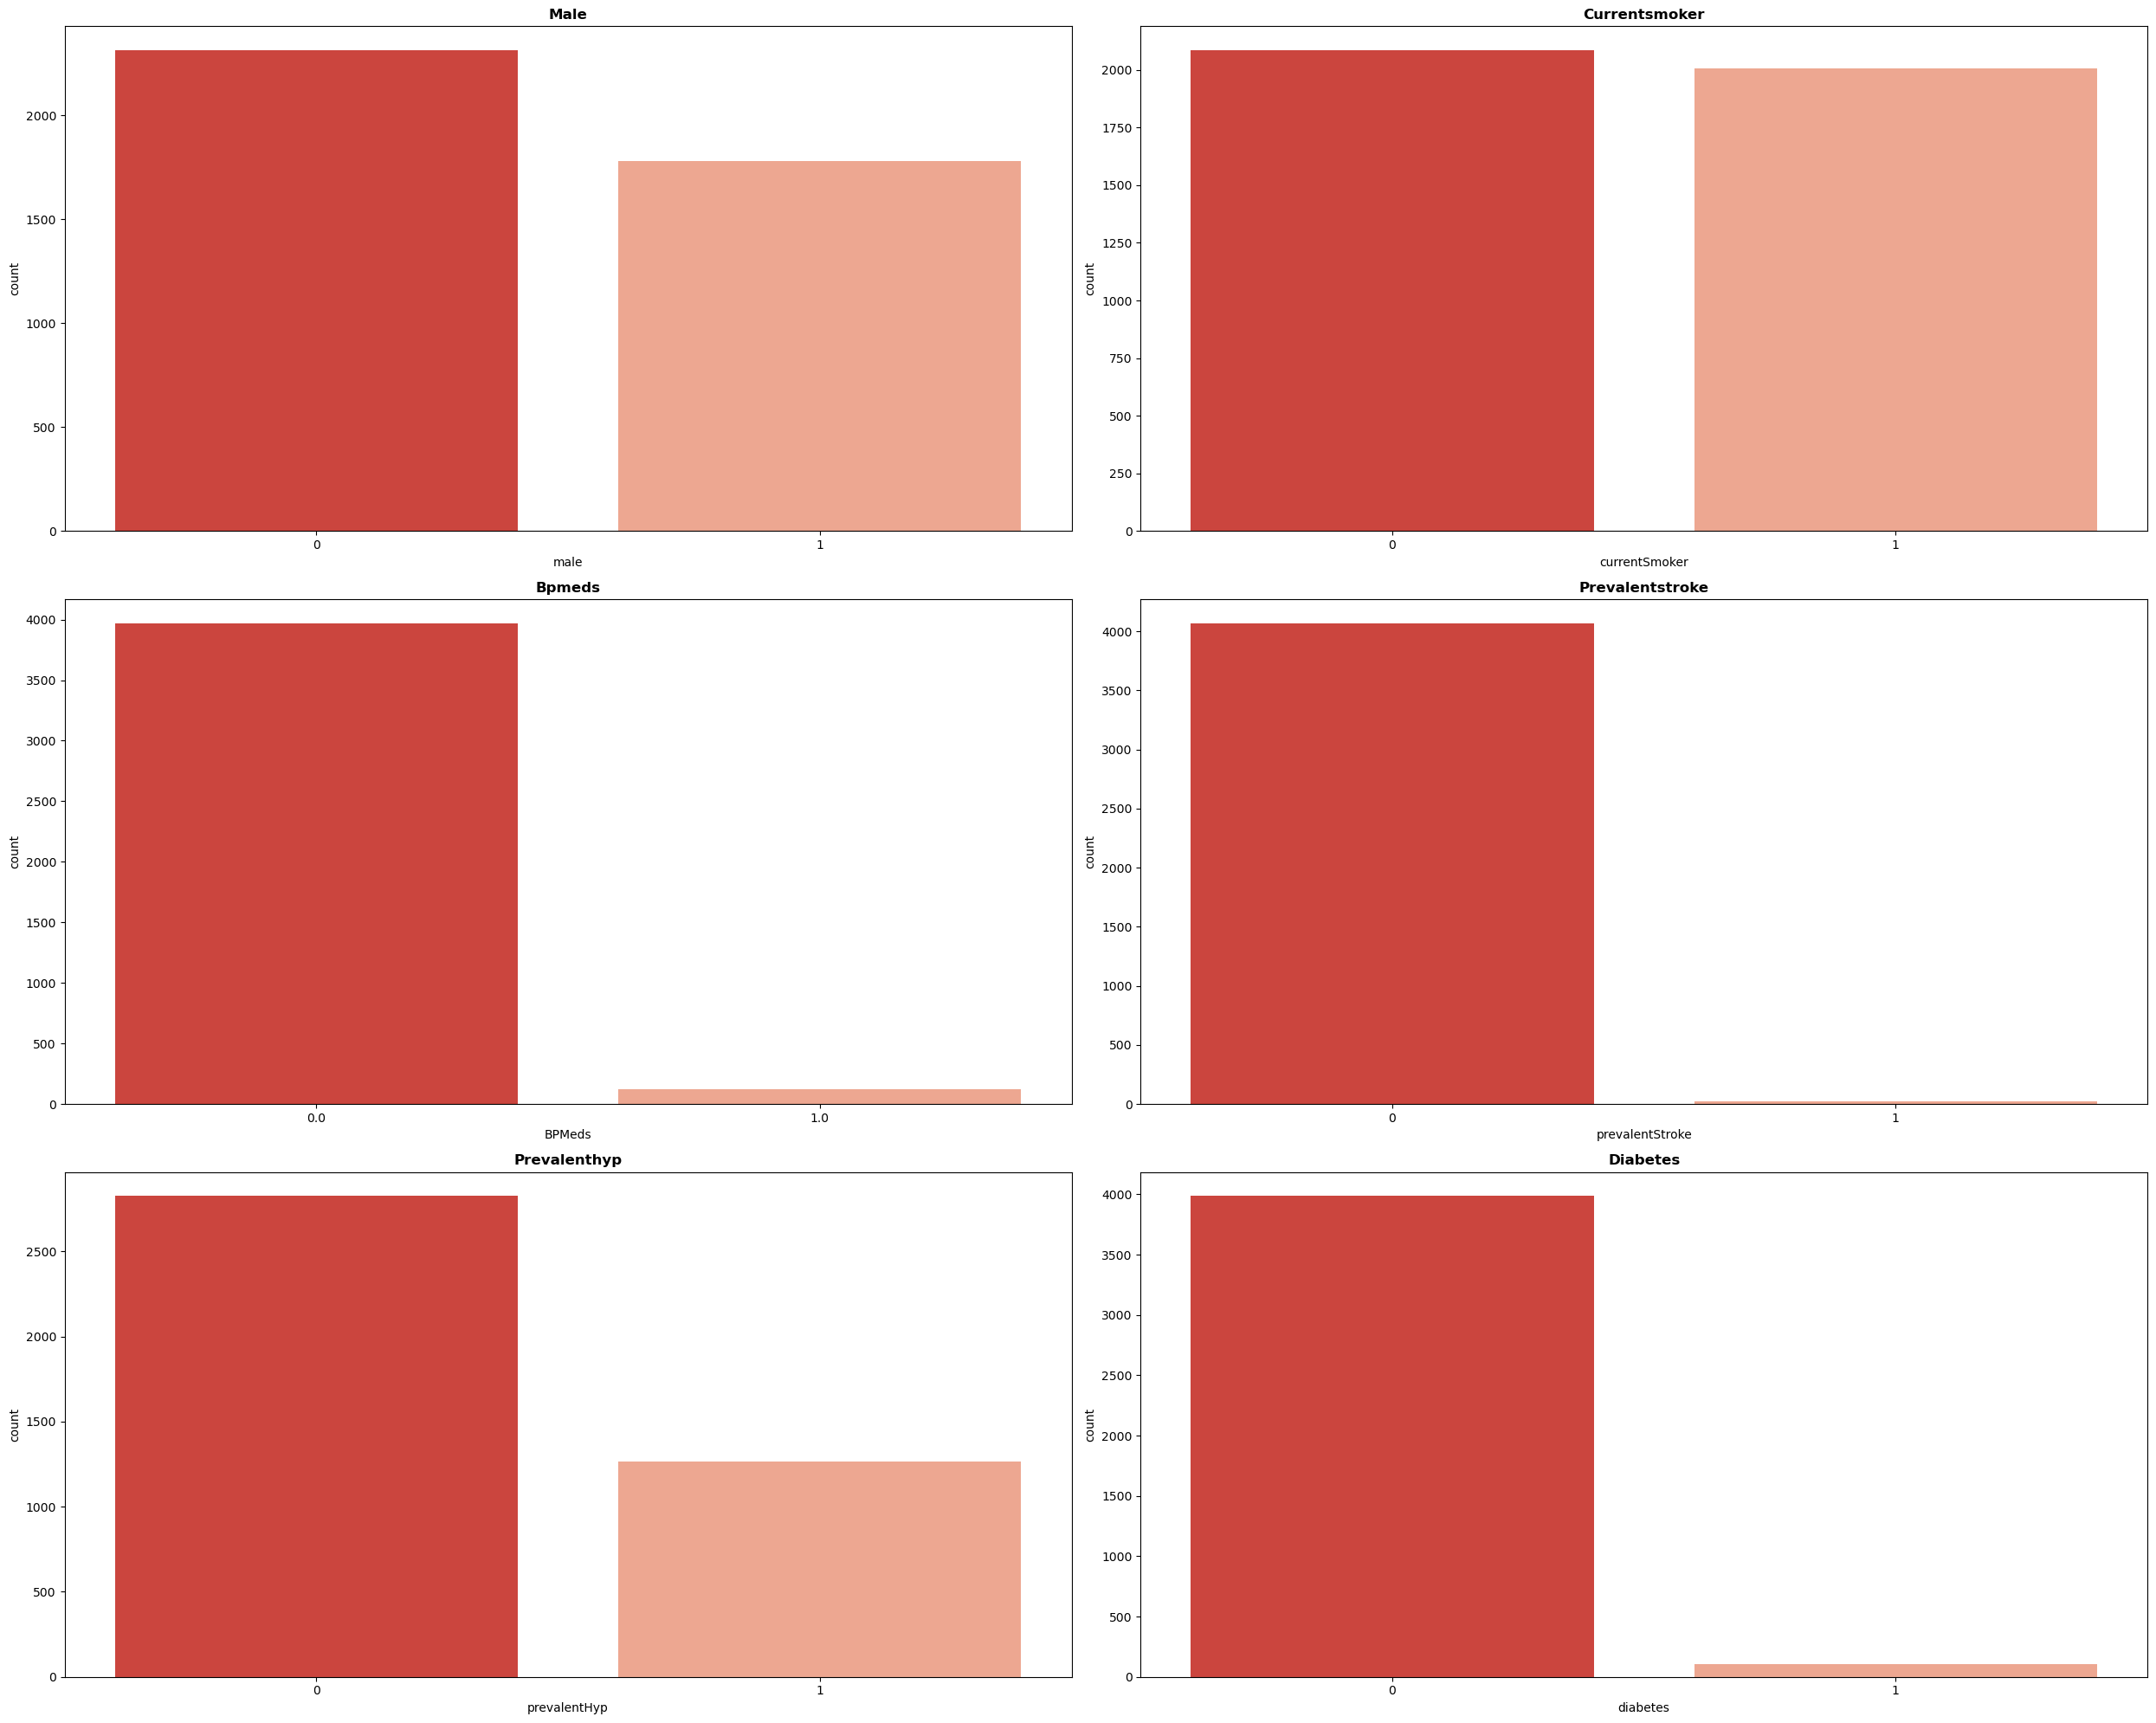

In [26]:
plt.figure(figsize=(25,20))

for n,column in enumerate(catag):
    plot=plt.subplot(3,2,n+1)
    
    plt.xlabel(column)
    plt.ylabel("count")
    sns.countplot(x=df1[column],color="red", palette="Reds_r",data=df1)
    plt.title(f'{column.title()}',weight="bold")
    plt.tight_layout()

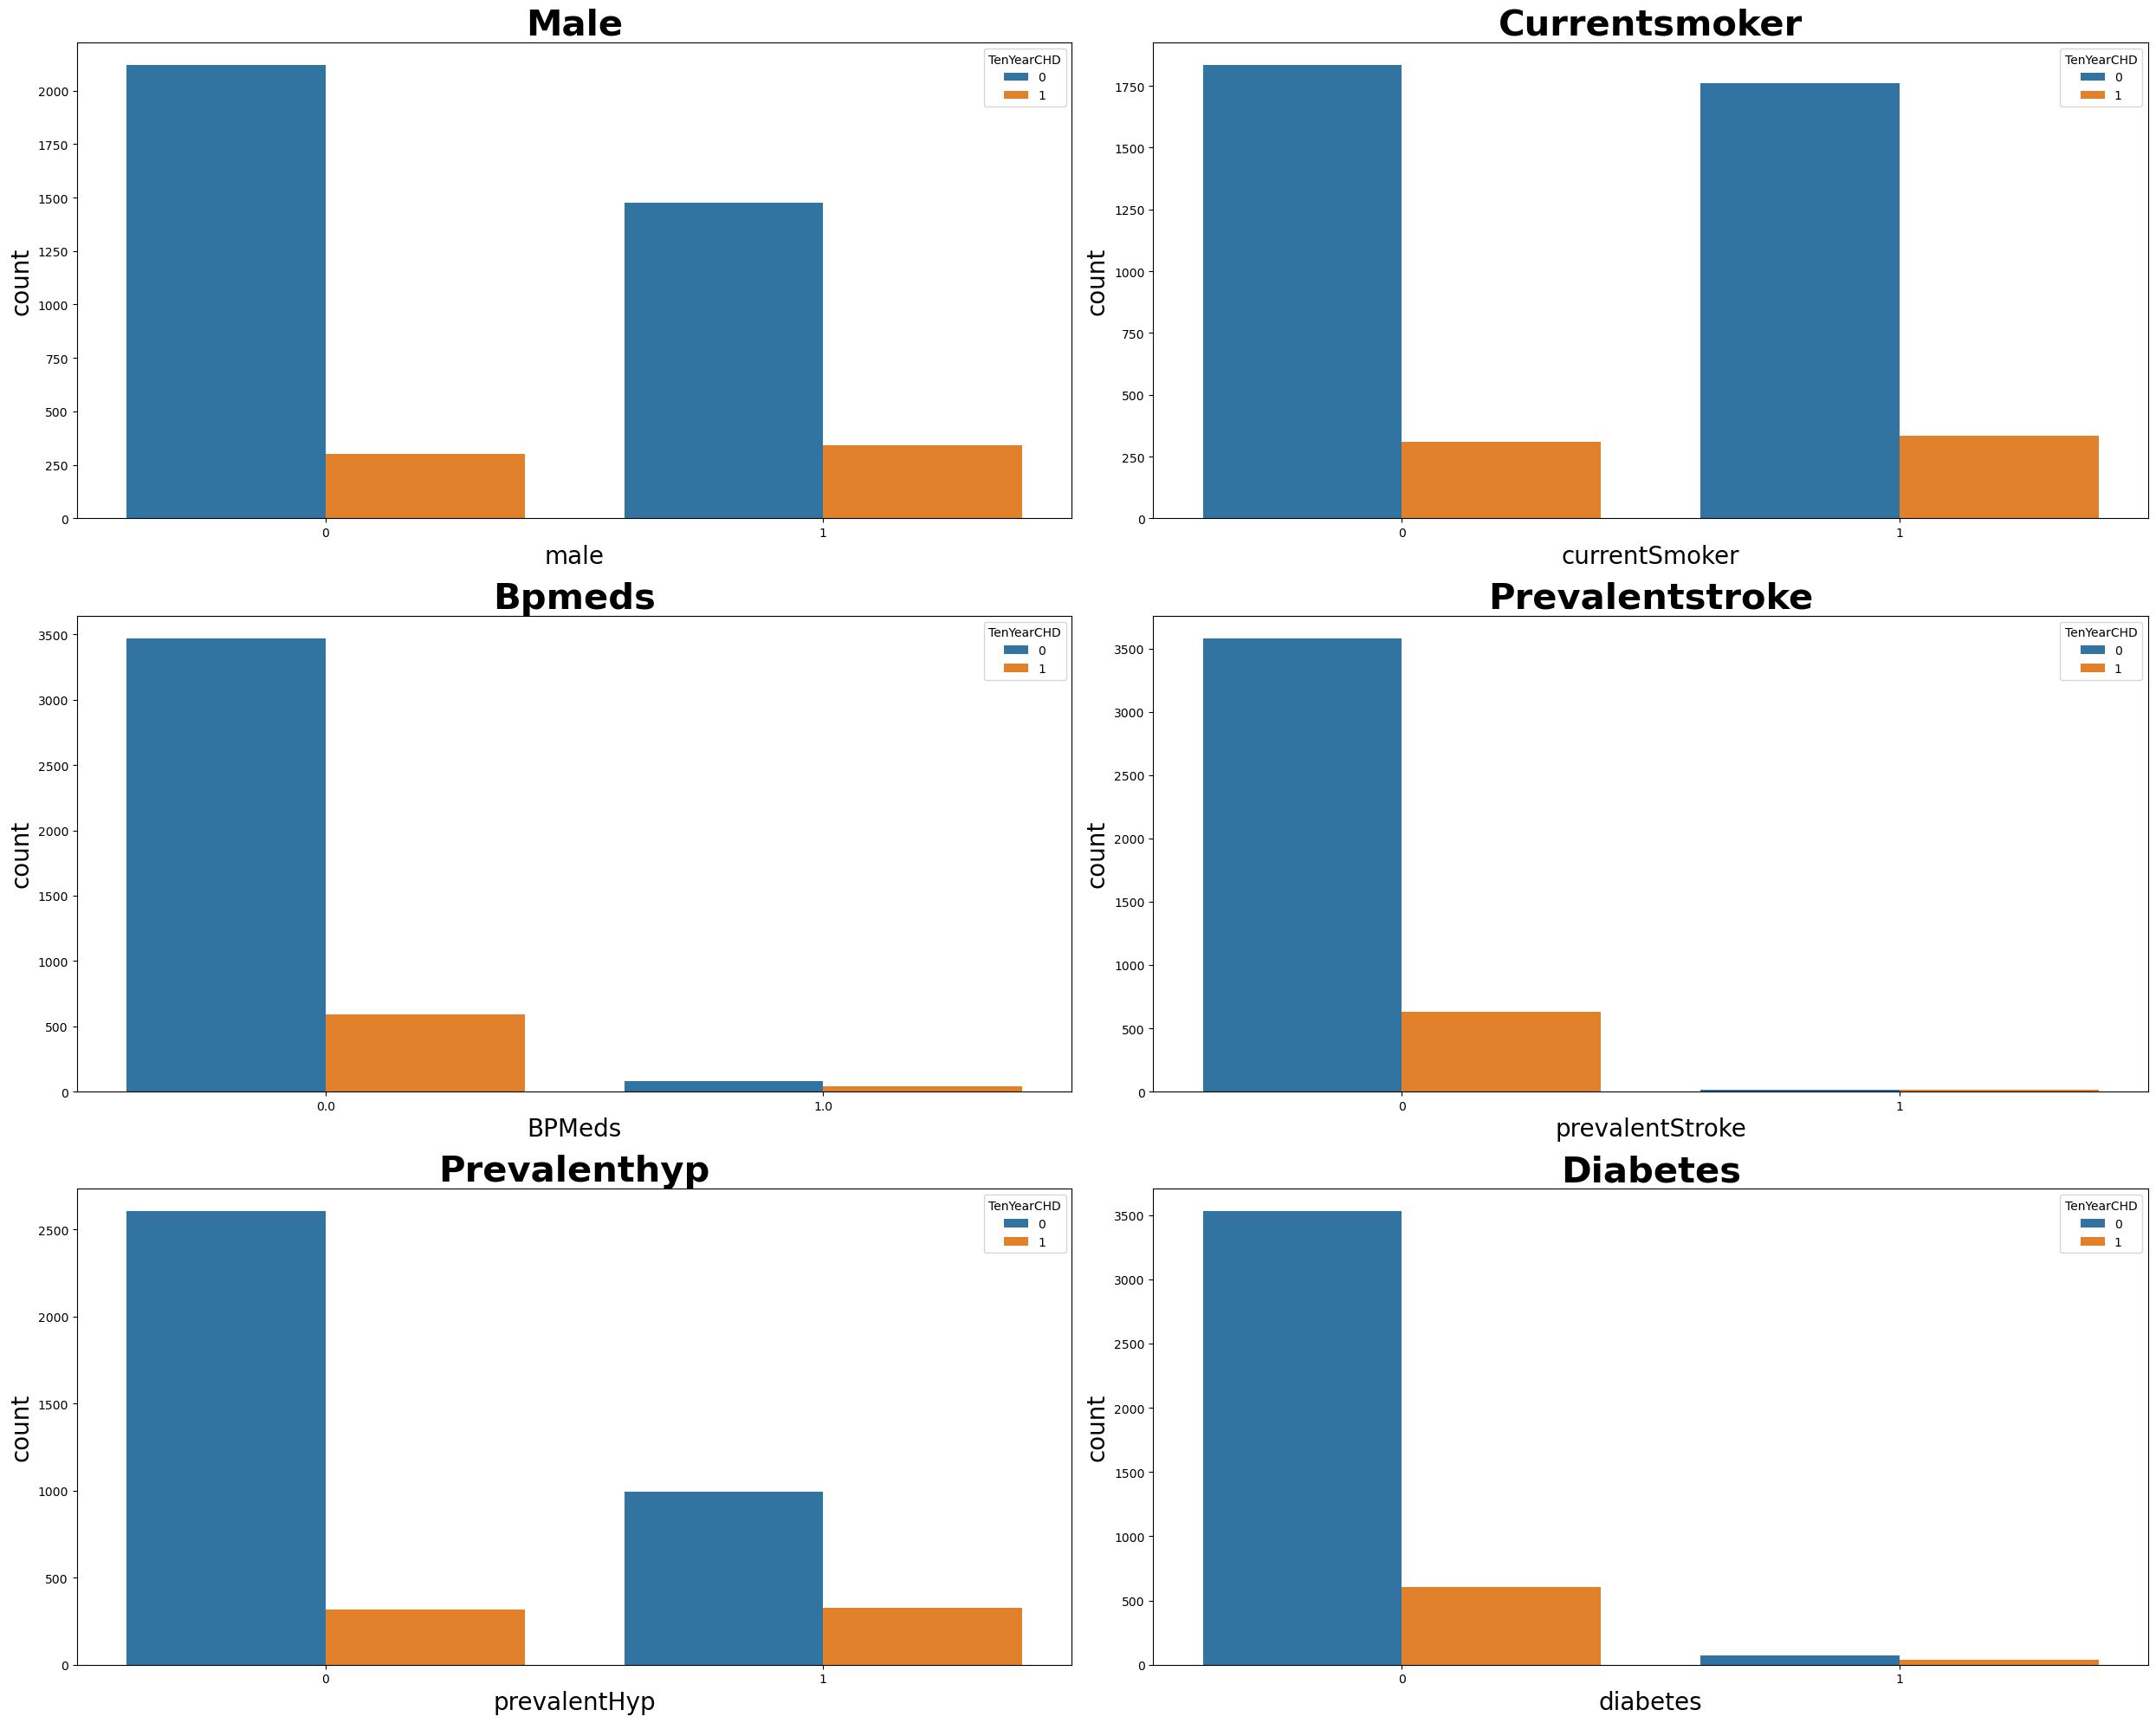

In [27]:
plt.figure(figsize=(25,20))
for n,column in enumerate(catag):
    plot=plt.subplot(3,2,n+1)
    plt.xlabel(column,fontsize=20)
    plt.ylabel("count",fontsize=20)
    sns.countplot(x=df[column],hue=df["TenYearCHD"],data=df1)
    plt.title(f'{column.title()}',weight='bold',fontsize=30)
    plt.tight_layout()

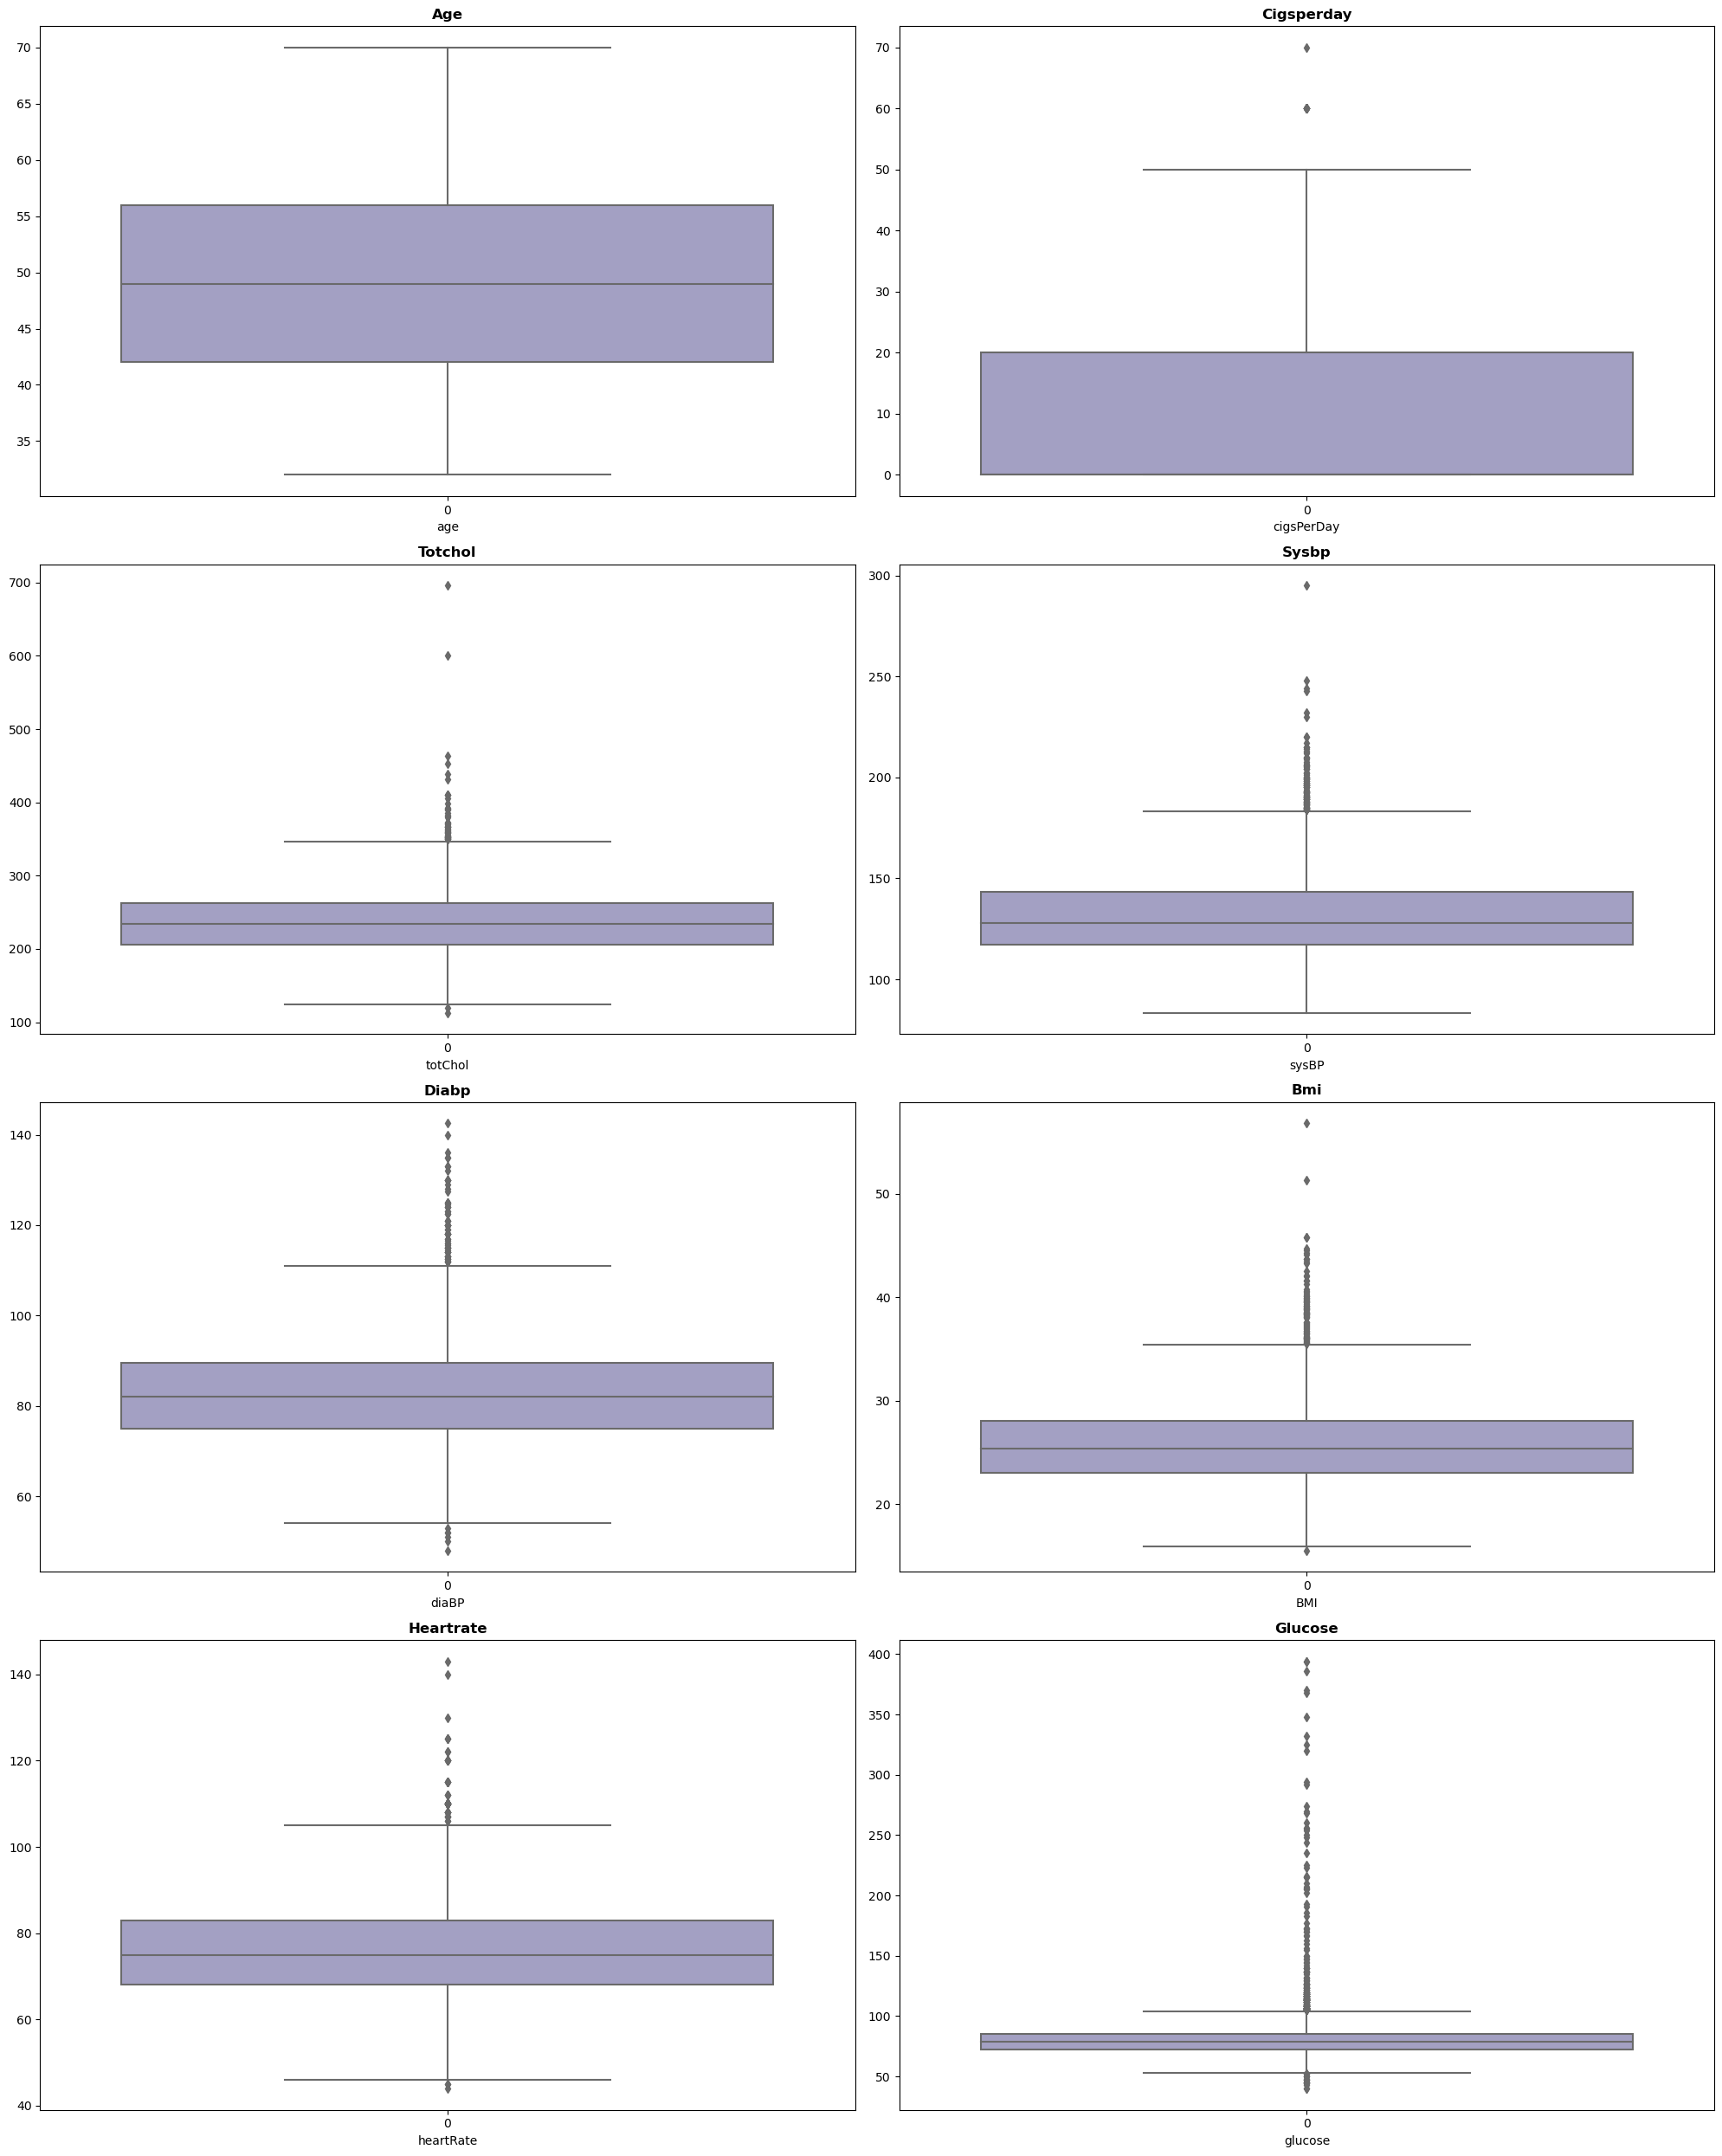

In [28]:
plt.figure(figsize=(20,25))

for n,column in enumerate(rand):
    
    plot=plt.subplot(4,2,n+1)
    plt.xlabel(column)
    sns.boxplot(df1[column],palette="Purples_r")
    plt.title(f'{column.title()}',weight="bold")
    plt.tight_layout()
plt.show()

In [29]:
rows_with_700_cholesterol = df1[df1['totChol'] > 500]
rows_with_700_cholesterol 

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1111,0,52,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
3160,1,51,1,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0


The data points provided for two individuals show very high total cholesterol levels (600 mg/dL and 696 mg/dL). While it is possible for individuals to have extremely high cholesterol levels, depending on other medical conditions such as thyroid issues, and kidney diseases.These values are significantly higher than the typical ranges seen in the general population.

It's important to understand the context of the data by:  
- Checking for data entry errors.
- Seeking advice from healthcare professionals or researchers familiar with the Framingham Heart Study dataset to understand if such high cholesterol levels are plausible.

Here I choose to remove this outlier, to  ensure the validity and reproducibility of  analysis.

In [30]:
#removing the rows with 'totChol'  greater than 500
df1=df1[df1['totChol']<=500]


In [31]:
df1.shape

(4088, 15)

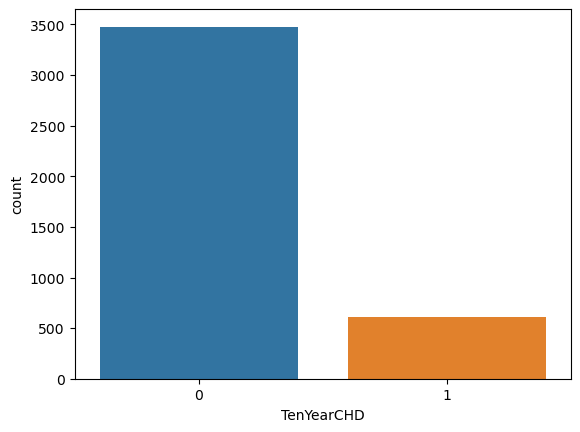

There are 3478 patients without heart disease and 610 patients with heart disease


In [32]:
#case counts

sns.countplot(x='TenYearCHD',data=df1)
plt.show()
cases=df1.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with heart disease")

**It looks as if the data is highly imbalnced hence we need to balance it before model fitting**

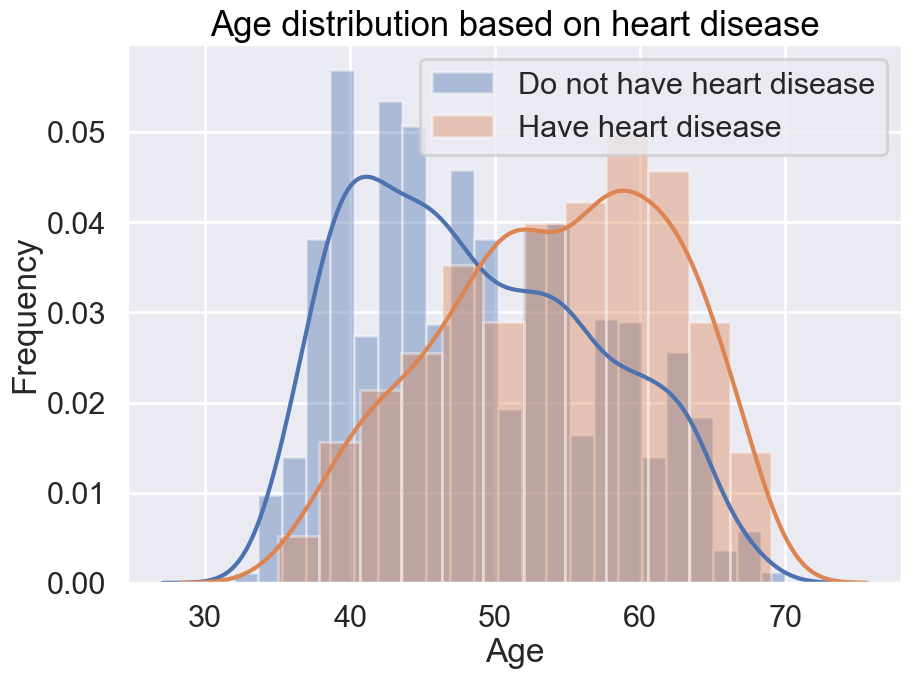

In [33]:
sns.set_theme(context='poster')
plt.figure(figsize=(10,7))
plt.title('Age distribution based on heart disease', color="Black",fontsize=25)

sns.distplot(df1[df1['TenYearCHD'] == 0]['age'], label='Do not have heart disease')
sns.distplot(df1[df1['TenYearCHD'] == 1]['age'], label = 'Have heart disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

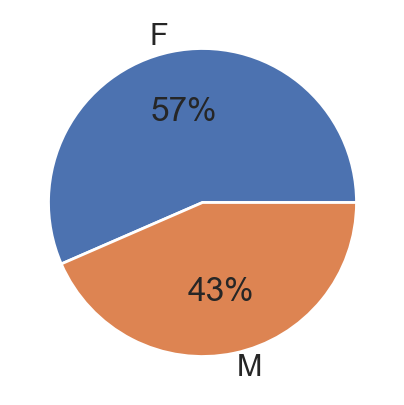

male
0    2311
1    1777
Name: count, dtype: int64


In [34]:
# list for the sex column
gender = ['F','M']

# make an object which store value count of the elements in sex column
gender_data = pd.Series(df1['male']).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(5,5))

# ploting pie chart
plt.pie(gender_data,labels=gender,autopct='%.0f%%')

plt.show()
print(df1['male'].value_counts())

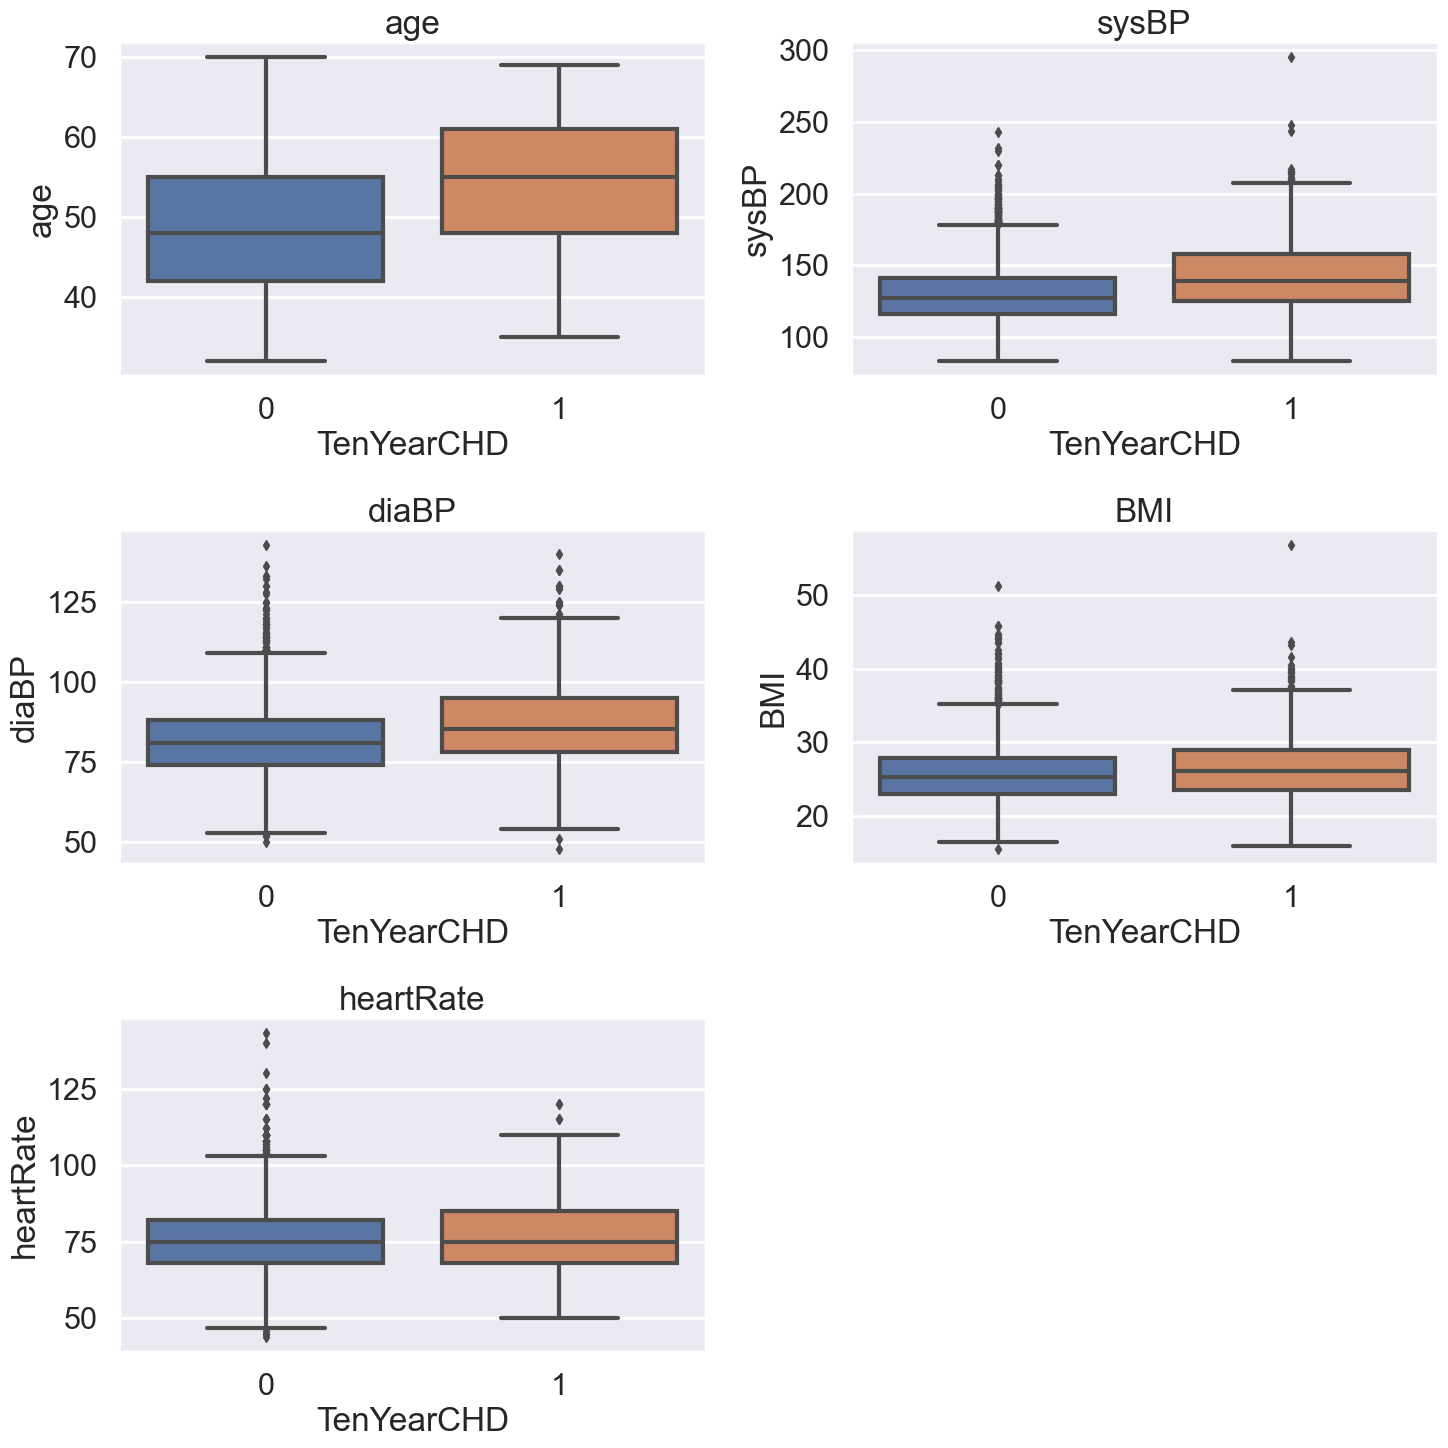

In [35]:
# making boxplots to see the distribution
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.boxplot(x=df1['TenYearCHD'],y=df1['age'])
plt.title('age')

plt.subplot(3,2,2)
sns.boxplot(x=df1['TenYearCHD'],y=df1['sysBP'])
plt.title('sysBP')

plt.subplot(3,2,3)
sns.boxplot(x=df1['TenYearCHD'],y=df1['diaBP'])
plt.title('diaBP')

plt.subplot(3,2,4)
sns.boxplot(x=df1['TenYearCHD'],y=df1['BMI'])
plt.title('BMI')

plt.subplot(3,2,5)
sns.boxplot(x=df1['TenYearCHD'],y=df1['heartRate'])
plt.title('heartRate')

plt.tight_layout()

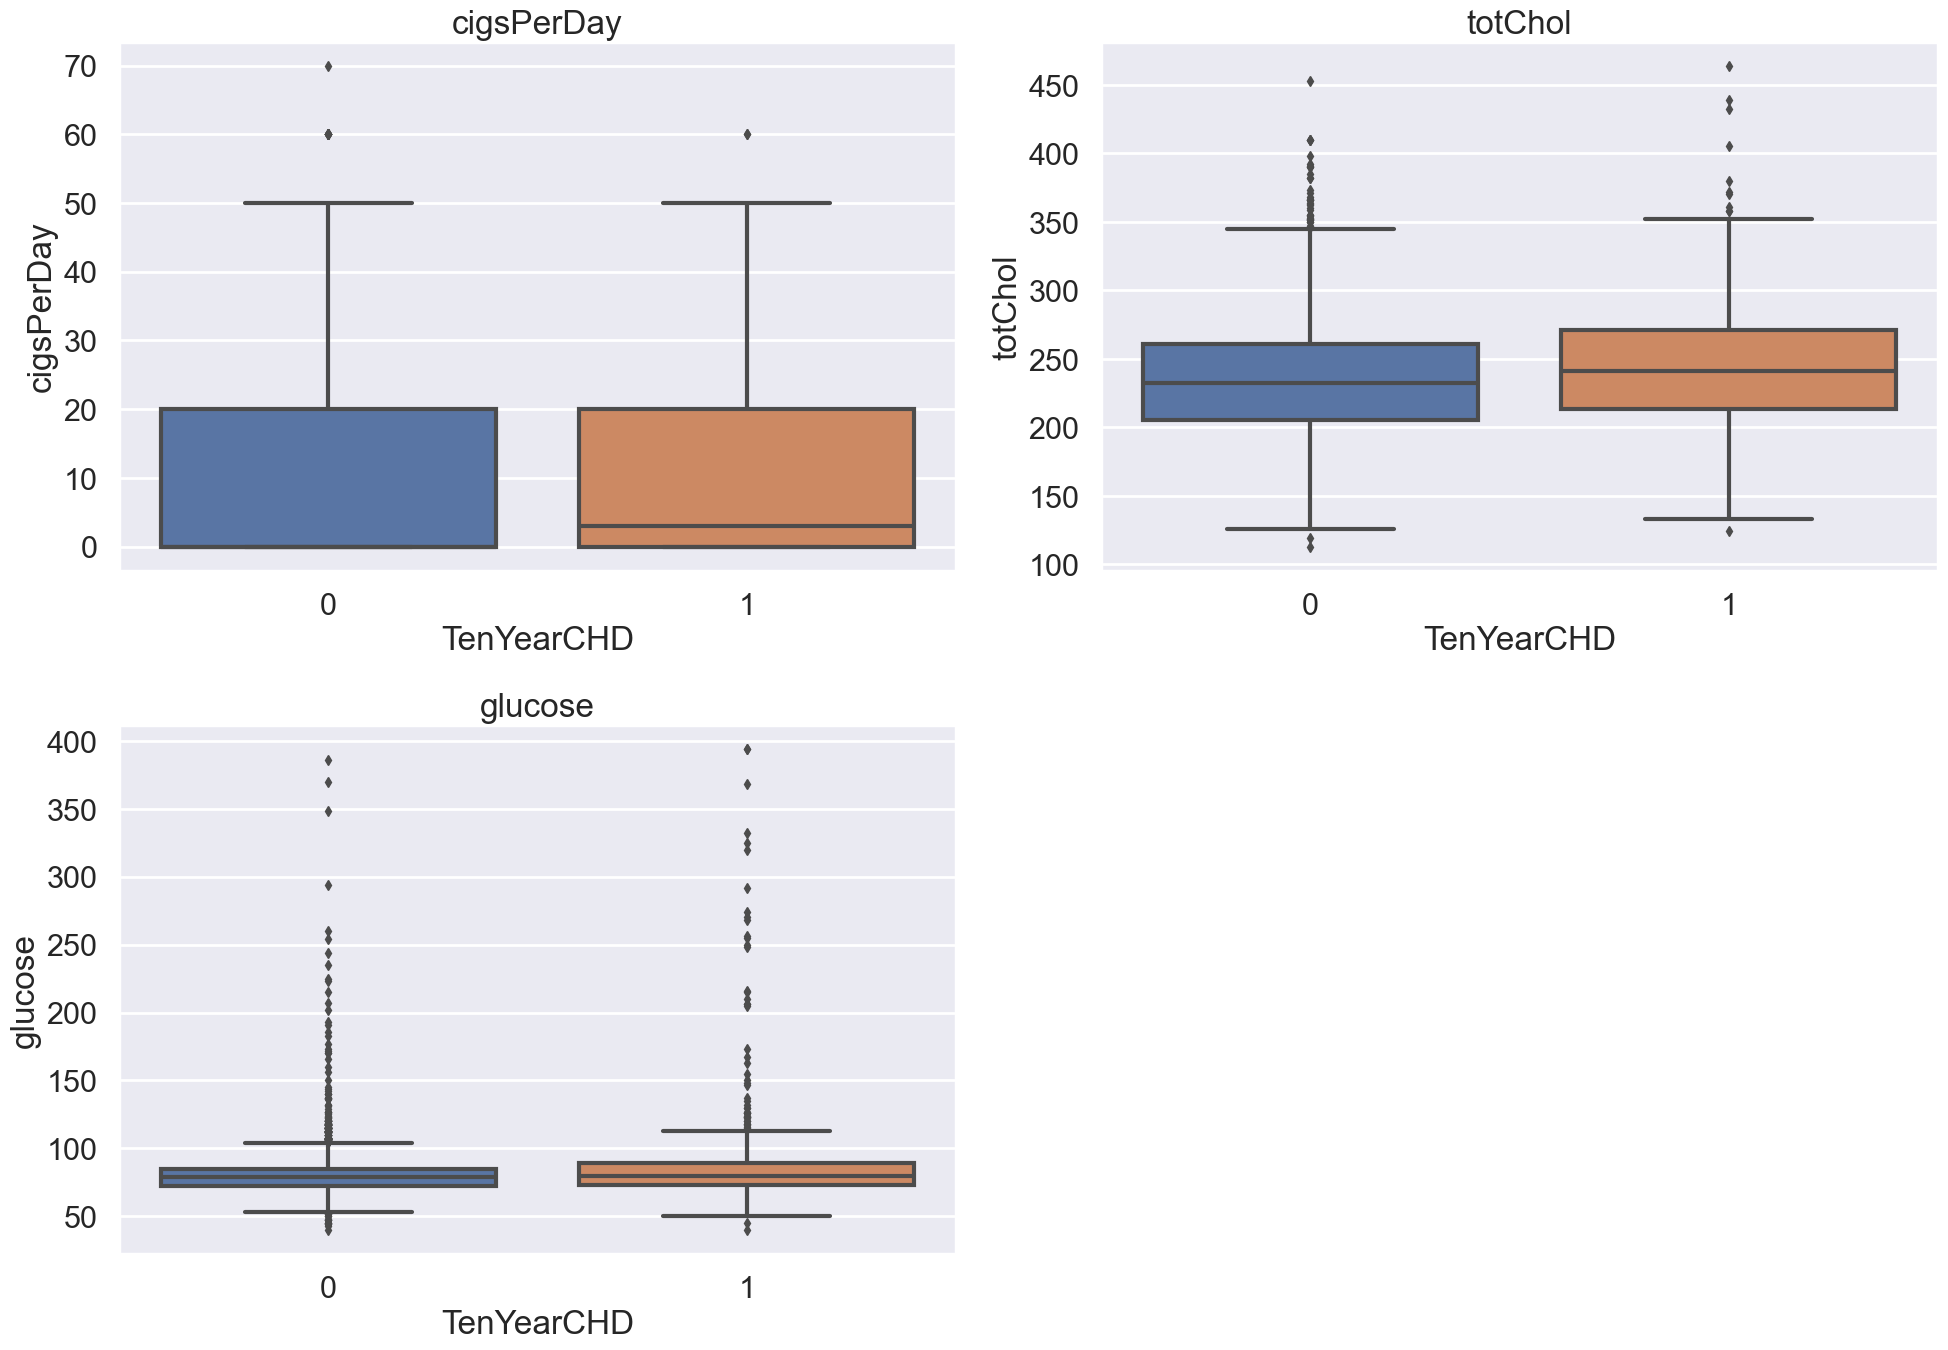

In [36]:
# making boxplots to see the distribution
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.boxplot(x=df1['TenYearCHD'],y=df1['cigsPerDay'])
plt.title('cigsPerDay')

plt.subplot(3,2,2)
sns.boxplot(x=df1['TenYearCHD'],y=df1['totChol'])
plt.title('totChol')

plt.subplot(3,2,3)
sns.boxplot(x=df1['TenYearCHD'],y=df1['glucose'])
plt.title('glucose')

plt.tight_layout()

### Handling Class imbalance

ADASYN (Adaptive Synthetic Sampling) is a technique used in machine learning to address class imbalance in datasets. It is particularly useful in classification problems where one class is significantly more prevalent than the other(s), leading to biased models. ADASYN works by generating synthetic samples for the minority class, focusing more on difficult-to-classify instances, thereby balancing the class distribution and improving the model's ability to generalize to new data.

In [37]:
from collections import Counter

In [38]:
#let's define x and y

X=df1.drop(['TenYearCHD'],axis=1)
y=df1['TenYearCHD']

In [39]:
X.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [40]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [43]:
from imblearn.over_sampling import ADASYN


# Convert X and y to NumPy arrays
X_array = X.values
y_array = y.values


# Count class distribution before ADASYN
num_before = dict(Counter(y_array))

adasyn = ADASYN(random_state=42,n_neighbors=7)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Count class distribution after ADASYN
num_after = dict(Counter(y_adasyn))

# Print class distributions
print("Class distribution before ADASYN:", num_before)
print("Class distribution after ADASYN:", num_after)

Class distribution before ADASYN: {0: 3478, 1: 610}
Class distribution after ADASYN: {0: 3478, 1: 3445}


### TRAIN TEST SPLIT

In [44]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score,GridSearchCV

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X_adasyn,y_adasyn,test_size=0.25,random_state=40)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5192, 14), (1731, 14), (5192,), (1731,))

In [46]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [47]:
# lets standardise the X_train and X_test

standard=StandardScaler()

X_train=standard.fit_transform(X_train)
X_test=standard.transform(X_test)

### MODEL CREATION

The five algorithms that will be used are:

- Logistic Regression
- k-Nearest Neighbours
- Decision Trees
- Support Vector Machine 
- Random Forest Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [49]:
#Function to plot accuracy metrics
def model_metrics(actual, predicted):
    confusion = confusion_matrix(actual, predicted)
    TP=confusion[1,1] #True positives
    TN= confusion[0,0] #True Negatives
    FP=confusion[0,1] #False Positives
    FN= confusion[1,0] #False Negatives
    acc_score = round(accuracy_score(actual, predicted),2) #accuracy score
    rcl_score=round(recall_score(actual, predicted),2) #recall score
    roc_score = round(roc_auc_score(actual, predicted),2) # roc_auc score
    fpr = round(FP/float(TN+FP),2) #False Positive Ratio
    specificity = round(TN/float(TN+FP),2) #False Positive Ratio
    metrics_df = pd.DataFrame(data=[[acc_score,roc_score,fpr,\
                                     specificity,rcl_score,TP,\
                                     TN,FP,FN,]],columns=['accuracy','roc_auc','fpr','specificity','recall_score',\
                                                          'true_positive','true_negative',\
                                                          'false_positive','false_negative'],index=['score'])
    return metrics_df

### Model 1: LOGISTIC REGRESSION

In [50]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
lr_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [51]:
lr_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']})

In [52]:
lr_clf.best_params_

{'C': 1, 'class_weight': None, 'penalty': 'l2'}

In [53]:
lr_predict=lr_clf.predict(X_test)

In [54]:
print('Classification Report:\n')
print(classification_report(y_test,lr_predict))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,lr_predict))
model_metrics(y_test,lr_predict)

Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       866
           1       0.68      0.69      0.68       865

    accuracy                           0.68      1731
   macro avg       0.68      0.68      0.68      1731
weighted avg       0.68      0.68      0.68      1731

Confusion Matrix:

[[584 282]
 [268 597]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.68,0.68,0.33,0.67,0.69,597,584,282,268


In [98]:
#accuracy
log_accuracy = accuracy_score(y_test,lr_predict)
print(f"Using K-Nearest Neighbours we get an accuracy of {round(log_accuracy*100,2)}%")

Using K-Nearest Neighbours we get an accuracy of 68.23%


<Axes: >

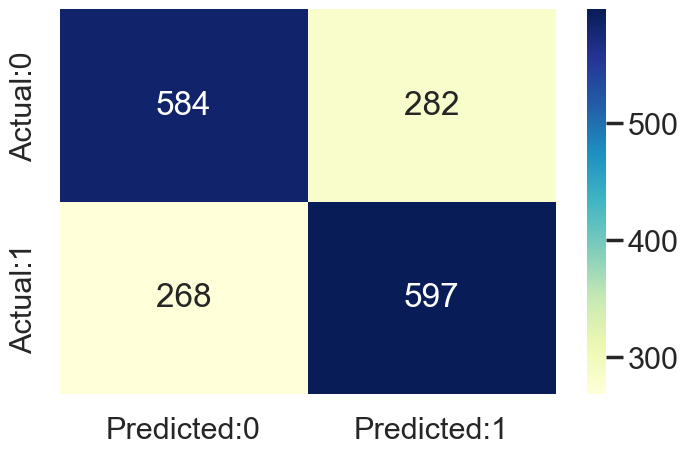

In [55]:
cm=confusion_matrix(y_test,lr_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

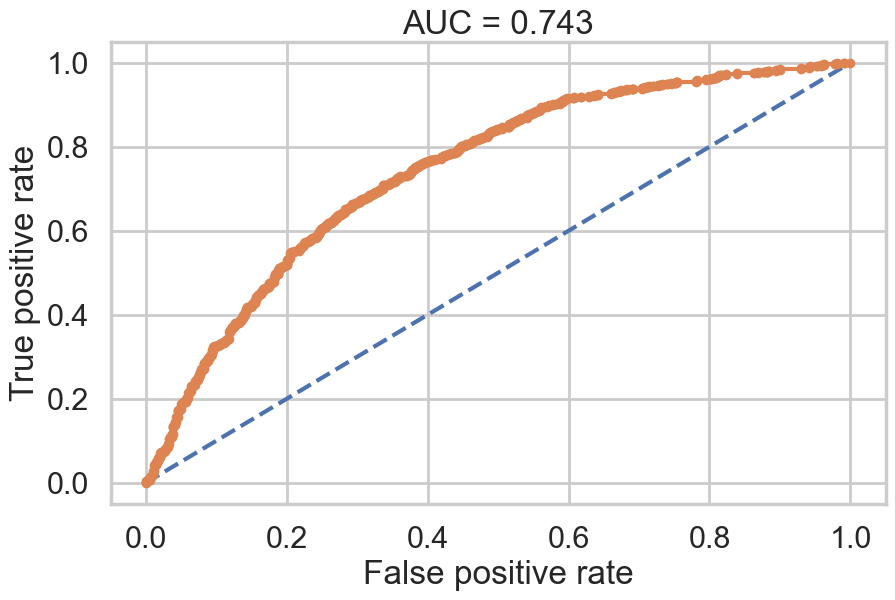

In [56]:
# ROC curve and AUC
probs = lr_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(lr_auc,3)}")
plt.show()

In [57]:
lr_f1 = f1_score(y_test, lr_predict)
print(f'The f1 score Logistic Regression is {round(lr_f1*100,2)}%')

The f1 score Logistic Regression is 68.46%


### Model 2 :K-Nearest Neighbours

In [58]:
# search for optimun parameters using gridsearch
params = {'n_neighbors': np.arange(1, 10)}
knn_clf = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params,
                           scoring = 'accuracy', cv = 10, n_jobs = -1)

In [59]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_

{'n_neighbors': 1}

In [60]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [61]:
print('Classification Report:\n')
print(classification_report(y_test,knn_predict))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,knn_predict))
model_metrics(y_test,knn_predict)

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       866
           1       0.75      0.92      0.83       865

    accuracy                           0.81      1731
   macro avg       0.83      0.81      0.81      1731
weighted avg       0.83      0.81      0.81      1731

Confusion Matrix:

[[606 260]
 [ 65 800]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.81,0.81,0.3,0.7,0.92,800,606,260,65


In [97]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using K-Nearest Neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using K-Nearest Neighbours we get an accuracy of 81.22%


<Axes: >

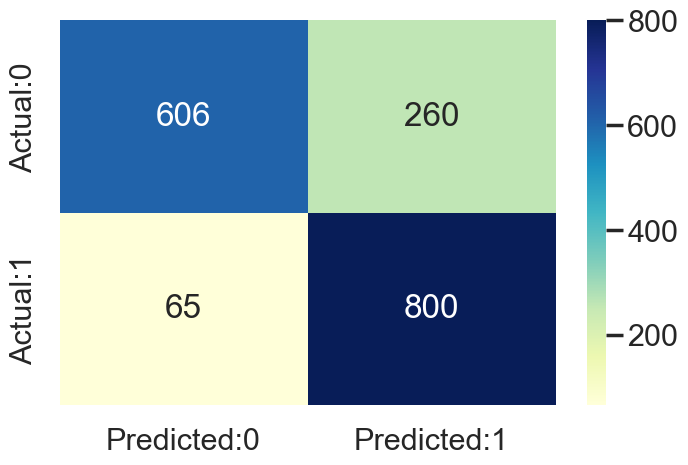

In [62]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

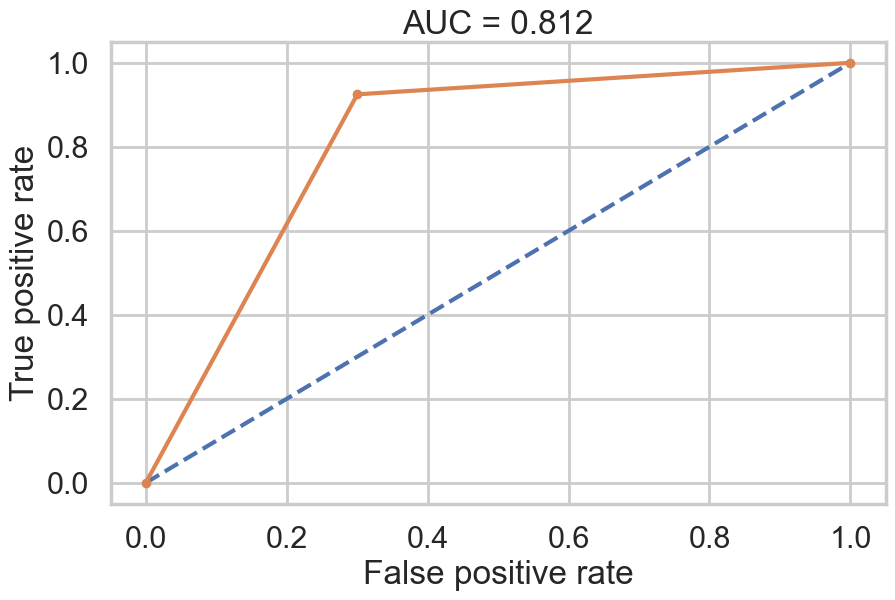

In [63]:
# ROC curve and AUC
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

In [64]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score K-Nearest Neighbours is {round(knn_f1*100,2)}%')

The f1 score K-Nearest Neighbours is 83.12%


### Model 3 :Decision Trees

In [65]:
d_tree= DecisionTreeClassifier(random_state=7)

In [66]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(d_tree, param_grid=params, n_jobs=-1)

In [67]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4}

In [68]:
tree_predict=tree_clf.predict(X_test)

In [69]:
print('Classification Report:\n')
print(classification_report(y_test,tree_predict))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,tree_predict))
model_metrics(y_test,tree_predict)

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       866
           1       0.74      0.74      0.74       865

    accuracy                           0.74      1731
   macro avg       0.74      0.74      0.74      1731
weighted avg       0.74      0.74      0.74      1731

Confusion Matrix:

[[634 232]
 [221 644]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.74,0.74,0.27,0.73,0.74,644,634,232,221


In [96]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using decision trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using decision trees we get an accuracy of 73.83%


<Axes: >

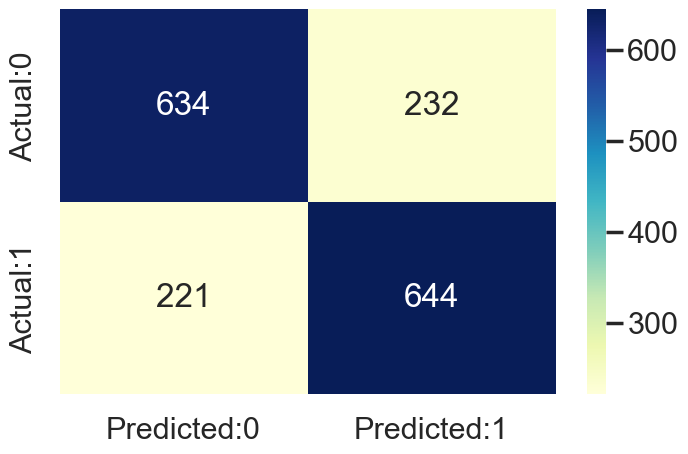

In [70]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

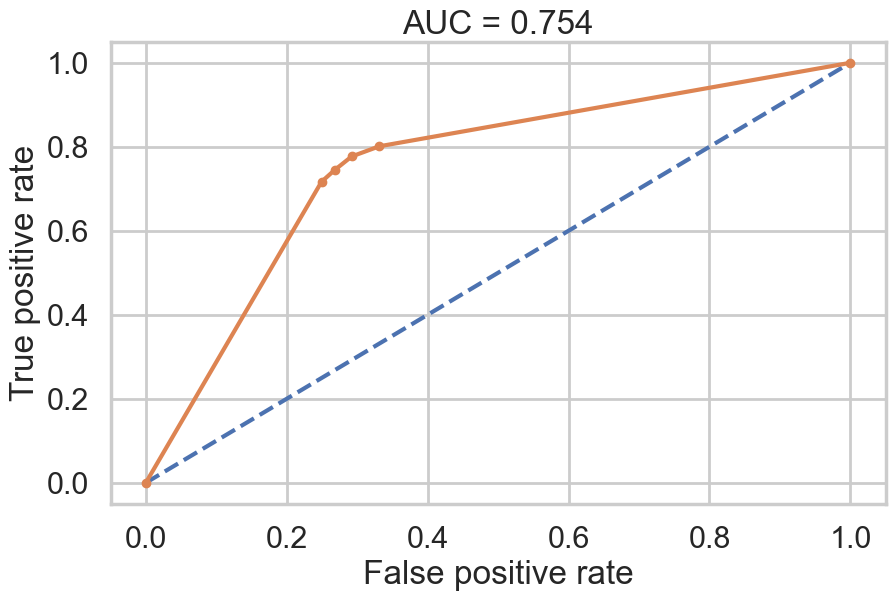

In [71]:
# ROC curve and AUC
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

In [72]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 73.98%


### Model 4: Support Vector Machine

In [73]:
pip install scikit-learn-intelex

Note: you may need to restart the kernel to use updated packages.


In [74]:
from sklearnex import patch_sklearn 
patch_sklearn()
from sklearn.svm import SVC 

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [75]:
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [76]:
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_


{'C': 10, 'gamma': 1}

In [77]:
# predictions
svm_predict = svm_clf.predict(X_test)

In [78]:
print('Classification Report:\n')
print(classification_report(y_test,svm_predict))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,svm_predict))
model_metrics(y_test,svm_predict)

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       866
           1       0.85      0.85      0.85       865

    accuracy                           0.85      1731
   macro avg       0.85      0.85      0.85      1731
weighted avg       0.85      0.85      0.85      1731

Confusion Matrix:

[[733 133]
 [132 733]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.85,0.85,0.15,0.85,0.85,733,733,133,132


In [95]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using support vector machine we get an accuracy of {round(svm_accuracy*100,2)}%")

Using support vector machine we get an accuracy of 84.69%


<Axes: >

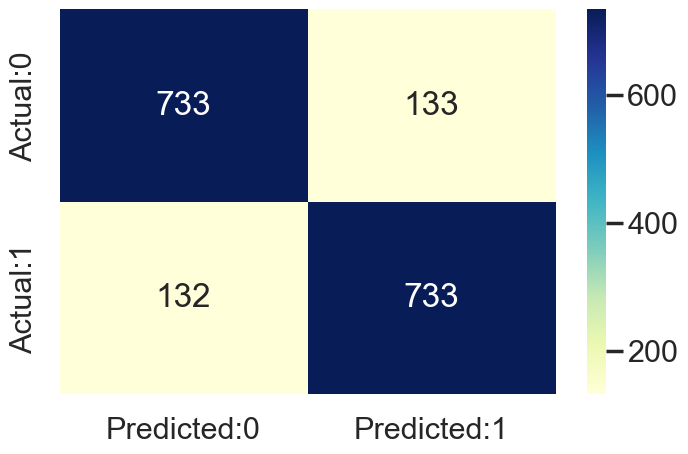

In [79]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

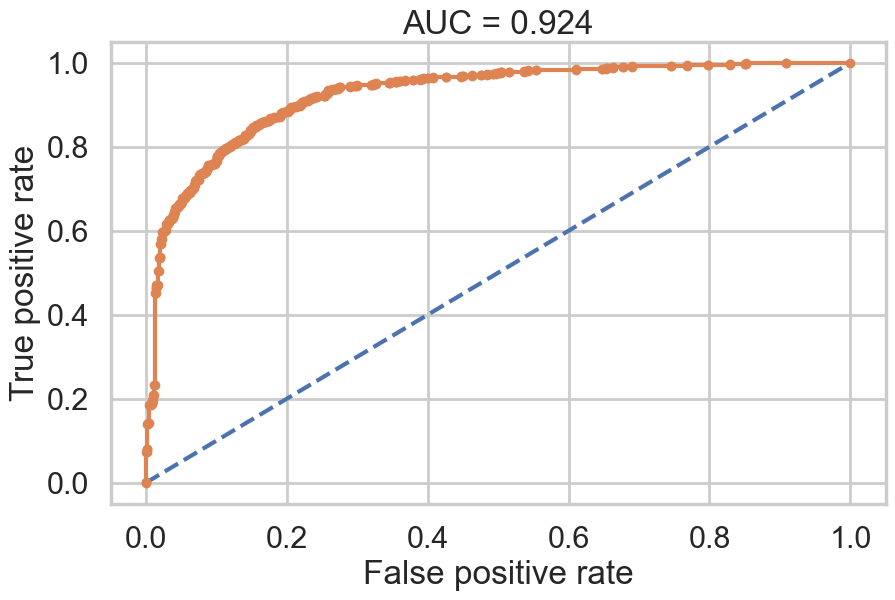

In [80]:
# ROC curve and AUC
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

In [82]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 84.69%


### Model 5: Random Forest Classifier

In [83]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [84]:
rf_classifier = RandomForestClassifier(random_state=42)

In [86]:
# Grid Search
rf_clf = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
rf_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [87]:
rf_clf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [88]:
# predictions
rf_predict = rf_clf.predict(X_test)

In [89]:
print('Classification Report:\n')
print(classification_report(y_test,rf_predict))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,rf_predict))
model_metrics(y_test,rf_predict)

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       866
           1       0.89      0.90      0.89       865

    accuracy                           0.89      1731
   macro avg       0.89      0.89      0.89      1731
weighted avg       0.89      0.89      0.89      1731

Confusion Matrix:

[[771  95]
 [ 88 777]]


,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
score,0.89,0.89,0.11,0.89,0.9,777,771,95,88


In [93]:
#accuracy
rf_accuracy = accuracy_score(y_test,rf_predict)
print(f"Using random forest we get an accuracy of {round(rf_accuracy*100,2)}%")

Using random forest we get an accuracy of 89.43%


<Axes: >

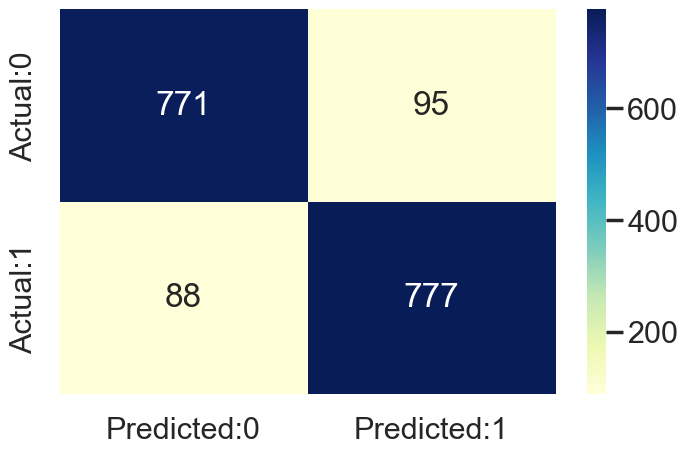

In [90]:
cm=confusion_matrix(y_test,rf_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

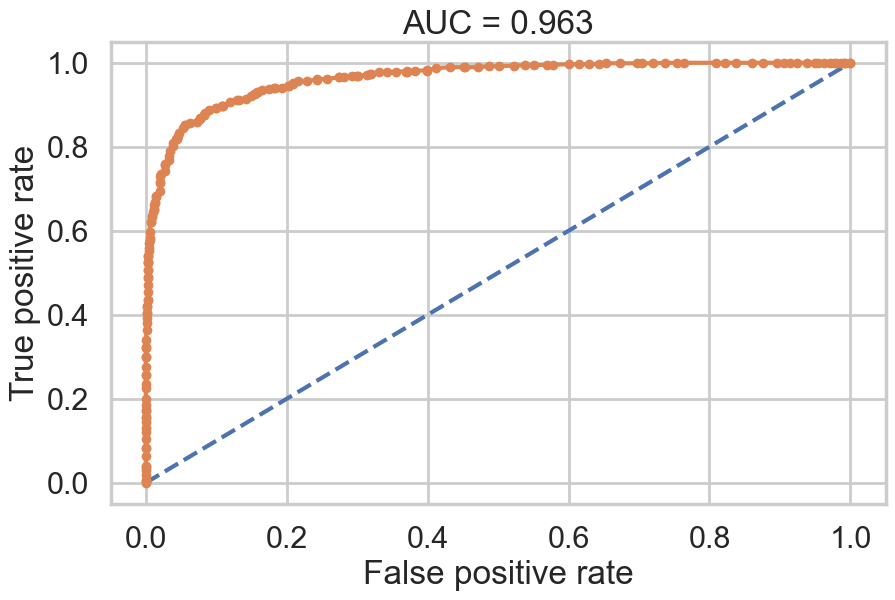

In [91]:
# ROC curve and AUC
probs = rf_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(rf_auc,3)}")
plt.show()

In [92]:
rf_f1 = f1_score(y_test, rf_predict)
print(f'The f1 score for SVM is {round(rf_f1*100,2)}%')

The f1 score for SVM is 89.46%


## Model Comparison

In [101]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':lr_auc, 'F1 score':lr_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1},
    "Random Forest Classifier":{'Accuracy':rf_accuracy, 'AUC':rf_auc, 'F1 score':rf_f1},
}).T

In [102]:
comparison

,Accuracy,AUC,F1 score
Logistic regression,0.682265,0.743014,0.684633
K-nearest neighbours,0.812247,0.812312,0.831169
Decision trees,0.738302,0.754430,0.739805
Support vector machine,0.846909,0.924347,0.846909
Random Forest Classifier,0.894281,0.963109,0.894646


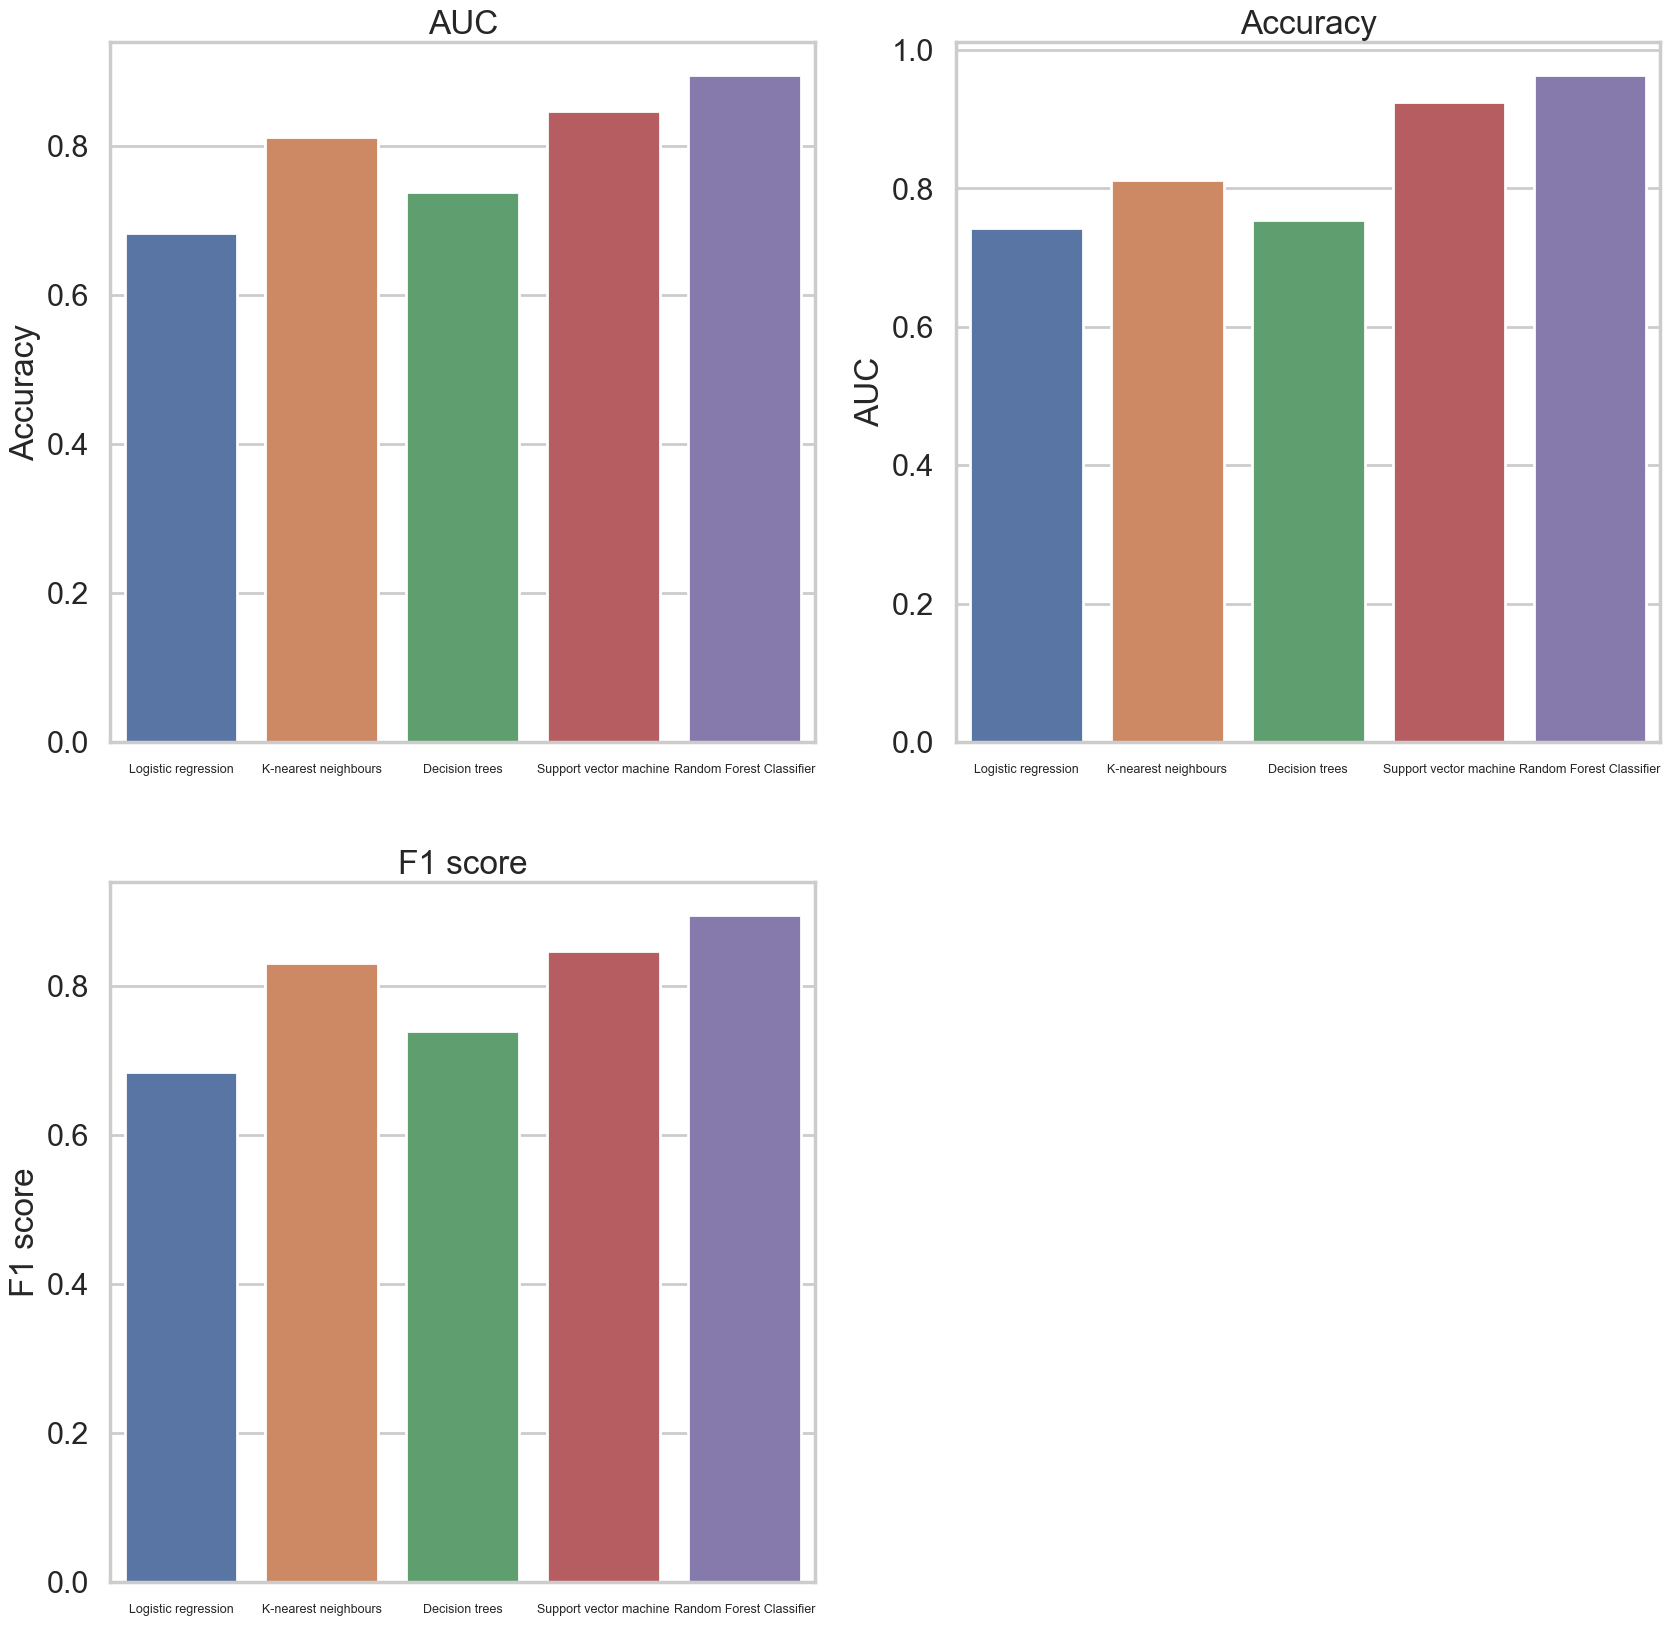

In [103]:
fig = plt.gcf()
fig.set_size_inches(20, 20)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=9)
    plt.title(titles[title])
plt.show()

### Insights

1. The pivotal predictors for estimating the ten-year risk of developing Coronary Heart Disease (CHD) were identified as age and systolic blood pressure, signifying their significant role in the predictive model.

2. Among the various machine learning models assessed, the Random Forest Classifier emerged as the top-performing model in terms of both accuracy and the F1 score. Its noteworthy high Area Under the Curve (AUC) underscores its robust true positive rate, making it a favorable choice for this task.

3. The implementation of the Adaptive Synthetic Sampling Technique (ADASYN) to balance the dataset yielded notable improvements in the models' sensitivity. This improvement was observed when comparing the performance metrics with those of other models evaluated in separate analyses on the same dataset.

4. It's important to note that, with a larger dataset, particularly an increase in data points for the minority class, the potential for building even more effective models becomes apparent. The availability of additional data can lead to improved model performance and predictive accuracy.

### Conclusion

In this project focused on healthcare,I utilized machine learning to extract valuable insights from medical data with the aim of aiding health-related decision-making. Through thorough experimentation with different machine learning algorithms, the project found that the Random Forest Classifier (RFC) stood out, achieving an impressive accuracy rate of 89.4%. This highlights RFC's effectiveness in accurately predicting health outcomes, a critical aspect for both medical professionals and patients.

These results hold great promise for the healthcare field. The ability to predict health outcomes with such accuracy could revolutionize patient care, enabling earlier disease detection, personalized treatment plans, and more efficient allocation of healthcare resources. This empowers healthcare providers with data-driven insights to make informed decisions, ultimately benefiting patient health.

Furthermore, this project highlights the transformative potential of machine learning in various industries. By leveraging data, we can drive innovation, improve decision-making processes, and contribute to a healthier future for everyone.